In [1]:
!pip install pysam
!pip install pandas

     |████████████████████████████████| 15.7 MB 23.0 MB/s eta 0:00:01    |████▉                           | 2.3 MB 23.0 MB/s eta 0:00:01


In [2]:
import pysam
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [49]:
samfiles=[]  #making samfiles array of imported samfiles down below, files with zero match aren't working in bwa mem tool
#samfiles.append(pysam.AlignmentFile("sam_file[0,-3,-7].sam","r"))
#samfiles.append(pysam.AlignmentFile("sam_file[0,-3,-5].sam","r"))
#samfiles.append(pysam.AlignmentFile("sam_file[0,-2,-7].sam","r"))
#samfiles.append(pysam.AlignmentFile("sam_file[0,-2,-5].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[1,-3,-7].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[1,-3,-5].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[1,-2,-7].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[1,-2,-5].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[2,-3,-7].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[2,-3,-5].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[2,-2,-7].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[2,-2,-5].sam","r"))

In [50]:
reads=[]
for samfile in samfiles:  #we are going through the samfiles 
    for read in samfile:
        reads.append(read)
    break

In [51]:
samfiles=[]  #making samfiles array of imported samfiles down below, files with zero match aren't working in bwa mem tool
#samfiles.append(pysam.AlignmentFile("sam_file[0,-3,-7].sam","r"))
#samfiles.append(pysam.AlignmentFile("sam_file[0,-3,-5].sam","r"))
#samfiles.append(pysam.AlignmentFile("sam_file[0,-2,-7].sam","r"))
#samfiles.append(pysam.AlignmentFile("sam_file[0,-2,-5].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[1,-3,-7].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[1,-3,-5].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[1,-2,-7].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[1,-2,-5].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[2,-3,-7].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[2,-3,-5].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[2,-2,-7].sam","r"))
samfiles.append(pysam.AlignmentFile("sam_file[2,-2,-5].sam","r"))

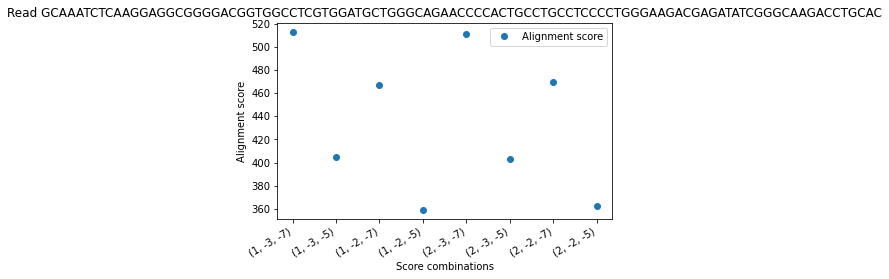

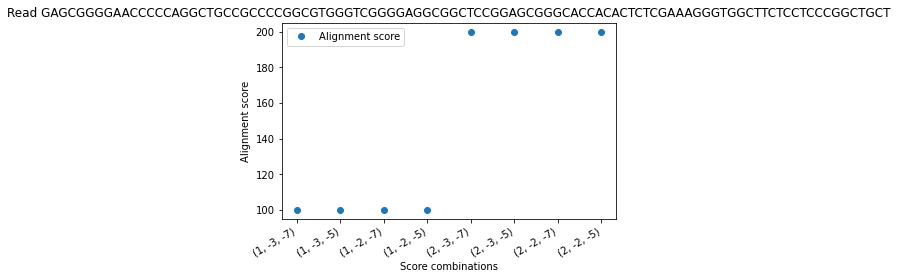

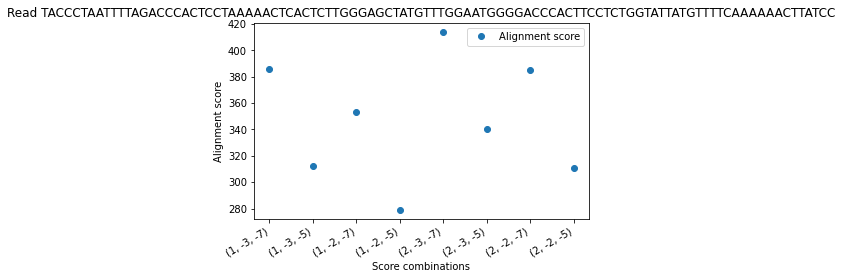

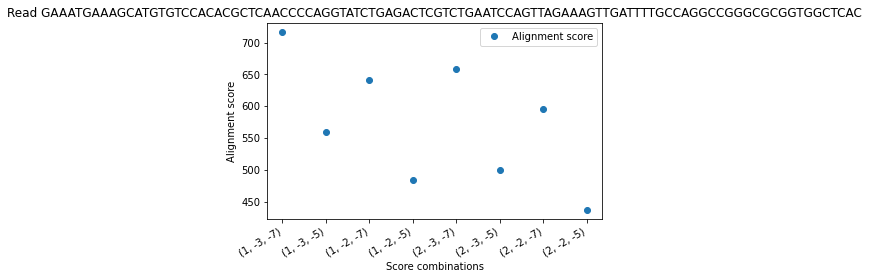

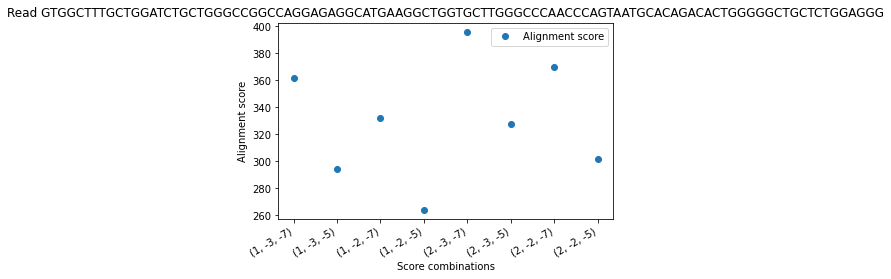

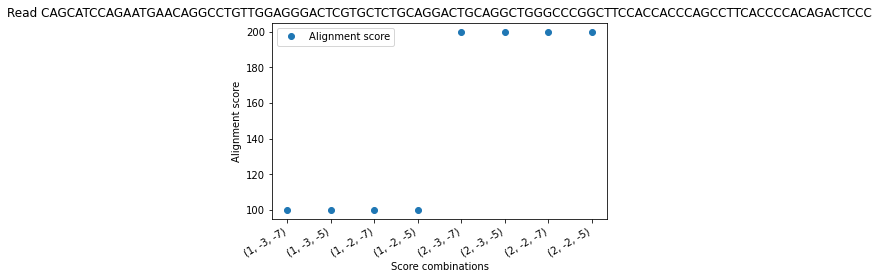

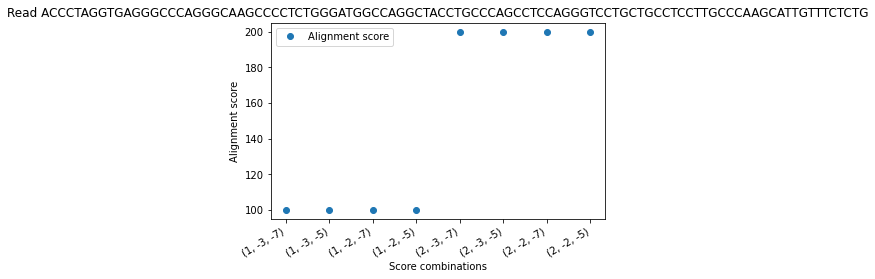

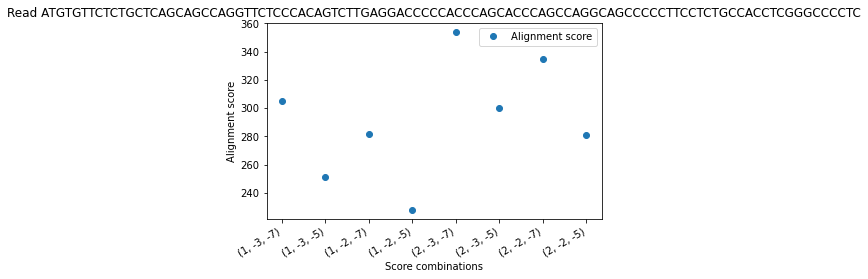

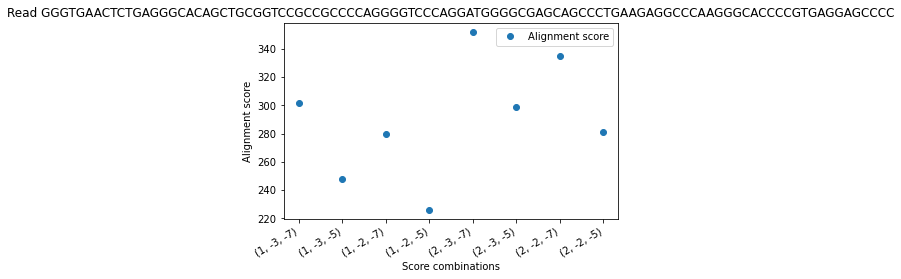

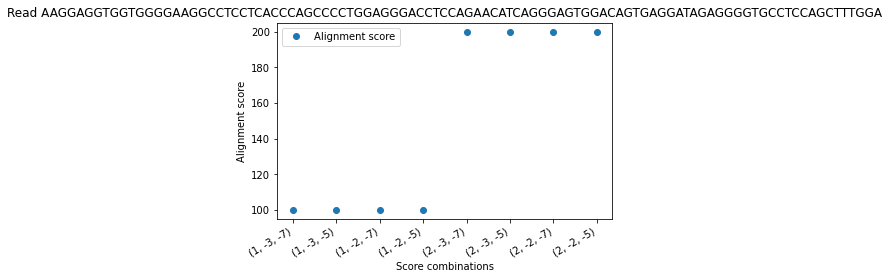

In [52]:
match=[1,2]    #generating combinations for match, mismatch and gap scores
mismatch=[-3, -2] #important: zero for match isn't working in bwa mem tool 
gap=[-7, -5]

kk=0
for read in reads:  #to find each read to get his start position, alignment score and edit transcript
    cols = ['Match-Mismatch-Gap', 'Start position', 'Alignment score', 'Edit transcript']
    df = pd.DataFrame(columns = cols, index=None) #creating dataframe by the labels of columns above
    #print(read)
    #print(f'\n')
    for i in range(8):
        if i==0:
            m=1
            miss=-3
            g=-7
        elif i==1:
            m=1
            miss=-3 
            g=-5
        elif i==2:
            m=1
            miss=-2
            g=-7
        elif i==3:
            m=1
            miss=-2
            g=-5
        elif i==4:
            m=2
            miss=-3
            g=-7
        elif i==5:
            m=2
            miss=-3
            g=-5
        elif i==6:
            m=2
            miss=-2
            g=-7
        elif i==7:
            m=2
            miss=-2
            g=-5
         #getting one by one from the each combination of scores
        for r in samfiles[i]:
            if r.seq!=read.seq: 
                continue
            
            df.loc[i, 'Match-Mismatch-Gap'] =(m,miss,g)
            df.loc[i, 'Start position']=r.pos
            df.loc[i, 'Alignment score']=r.tags[2][1]
            df.loc[i, 'Edit transcript']=r.cigarstring   #we are writing data for dataframe for each read
            break
    #display(df)
    df.to_csv(r'data_frame_read'+str(kk)+'_testSAM.csv', sep='\t')   #creating .csv file for each dataframe for each read
    df.plot(x='Match-Mismatch-Gap', y='Alignment score', marker = 'o', linestyle='none')  #plotting by each combination for each read
    plt.title('Read '+read.seq)
    plt.xlabel('Score combinations')
    plt.ylabel('Alignment score')
    plt.gcf().autofmt_xdate()
    plt.savefig(r'plot_read'+str(kk)+'_testSAM.png', dpi=100, bbox_inches='tight')  #creating .png file for each plot for each read
    #plt.show()
    kk+=1   #results of plots are down below, but of dataframes in the directory of GI2022Project
    if kk==10: break  #testing with a few reads, we are not sure why this error bellow occurs